In [2]:
!which python

/Users/debruppaul/HateSpeech/env/bin/python


In [4]:
from pathlib import Path
project_name='hate_speech'
file_path=Path(f"{project_name}/components/__init__.py")
print(file_path)

hate_speech/components/__init__.py


In [6]:
import os

file_dir,file_name=os.path.split(file_path)

print(file_dir,"/////",file_name)

hate_speech/components ///// __init__.py


In [7]:
import logging
import os

from from_root import from_root
from datetime import datetime

LOG_FILE=f"{datetime.now().strftime('%m_%d_%Y_%H_%M_%S')}.log"

logs_path=os.path.join(os.getcwd(),"logs",LOG_FILE)

print(logs_path)

os.makedirs(logs_path,exist_ok=True)

LOG_FILE_PATH=os.path.join(logs_path,LOG_FILE)

print(LOG_FILE_PATH)

/Users/debruppaul/HateSpeech/logs/10_28_2024_23_32_38.log
/Users/debruppaul/HateSpeech/logs/10_28_2024_23_32_38.log/10_28_2024_23_32_38.log


## EDA

In [1]:
import seaborn as sns
import pandas as pd

In [30]:
imbalanced_data=pd.read_csv("dataset 2/imbalanced_data.csv")
imbalanced_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [31]:
imbalanced_data.columns

Index(['id', 'label', 'tweet'], dtype='object')

<Axes: xlabel='label', ylabel='count'>

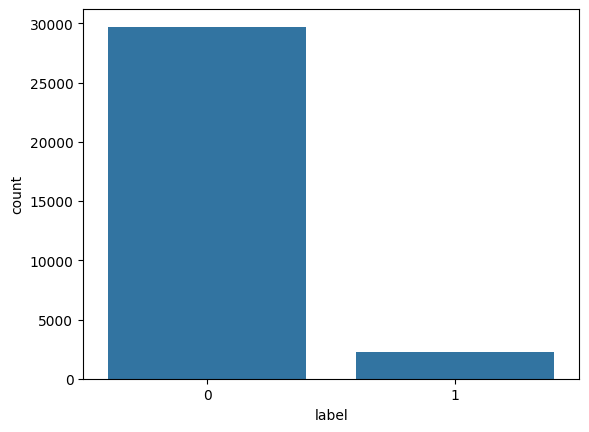

In [3]:
sns.countplot(x='label',data=imbalanced_data)

In [4]:
imbalanced_data.shape

(31962, 3)

In [5]:
imbalanced_data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
imbalanced_data.drop(['id'],axis=1,inplace=True)

In [7]:
imbalanced_data.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [27]:
raw_data=pd.read_csv("dataset 2/raw_data.csv")

In [28]:
raw_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [29]:
raw_data.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [10]:
raw_data.drop(['Unnamed: 0'	,'count'	,'hate_speech'	,'offensive_language','neither'],axis=1,inplace=True)

In [11]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<Axes: xlabel='class', ylabel='count'>

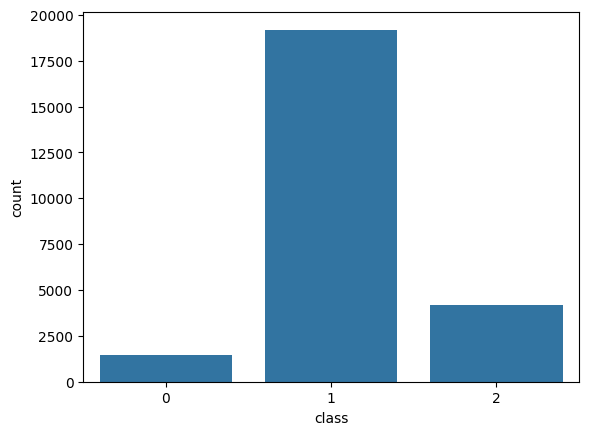

In [12]:
sns.countplot(x='class',data=raw_data)

- class 0: hate
- class 1: abusive
- class 2: no hate



In [13]:
raw_data[raw_data['class']==0]=1

In [14]:
raw_data.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


<Axes: xlabel='class', ylabel='count'>

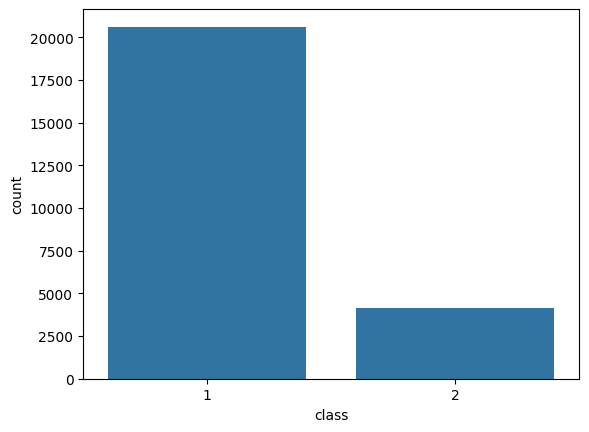

In [15]:
sns.countplot(x='class',data=raw_data)

In [16]:
raw_data['class'].replace({2:0},inplace=True)

/var/folders/5x/y57vz3lj3017tystcxcrhpmm0000gn/T/ipykernel_3524/3452875230.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  raw_data['class'].replace({2:0},inplace=True)


In [17]:
raw_data.rename(columns={'class':'label'},inplace=True)

<Axes: xlabel='label', ylabel='count'>

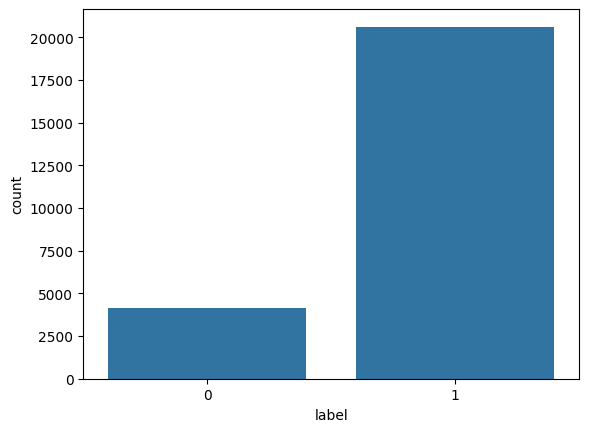

In [18]:
sns.countplot(x='label',data=raw_data)

In [19]:
frame=[imbalanced_data,raw_data]
df=pd.concat(frame)

In [20]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [25]:
df.columns[0]

'label'

<Axes: xlabel='label', ylabel='count'>

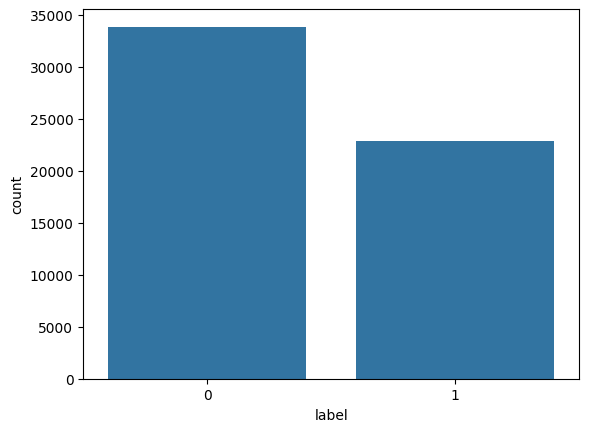

In [21]:
sns.countplot(x='label',data=df)

In [27]:
import re
import nltk
import string
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/debruppaul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stemmer=nltk.SnowballStemmer('english')
stopword=set(stopwords.words('english'))

In [29]:
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('\[.*?\]', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopword]
    words=" ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words=" ".join(words)

    return words
     

In [30]:
df['tweet']=df['tweet'].apply(data_cleaning)

In [31]:
df['tweet'][1]

1    user user thanks for lyft credit i cant use ca...
1     rt  boy dats coldtyga dwn bad for cuffin dat ...
Name: tweet, dtype: object

In [32]:
x=df['tweet']
y=df['label']

In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

42558 42558
14187 14187


In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences


In [38]:
max_word =50000

max_len= 300
tokenizer=Tokenizer(num_words=max_word)

tokenizer.fit_on_texts(x_train)

In [39]:
sequences=tokenizer.texts_to_sequences(x_train)
sequence_matrix=pad_sequences(sequences,maxlen=max_len)

In [40]:
sequence_matrix.shape

(42558, 300)

In [41]:
from keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SpatialDropout1D
from keras.optimizers import RMSprop

In [43]:
model = Sequential()
model.add(Embedding(max_word,100,input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

/Users/debruppaul/HateSpeech/env/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history = model.fit(sequences_matrix,y_train,batch_size=128,epochs = 1,validation_split=0.2)

In [45]:
model.save("model.h5")

In [47]:
import pickle
load_model=keras.models.load_model("download/model.h5")
with open('download/tokenizer.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [53]:
test="you are not bitch"
test=[data_cleaning(test)]
print(test)

seq = load_tokenizer.texts_to_sequences(test)
padded = pad_sequences(seq, maxlen=300)
print(seq)

pred = load_model.predict(padded)

print("pred", pred)
if pred<0.5:
    print("no hate")
else:
    print("hate and abusive")

['you are not bitch you are not bitch you are not bitch you are not bitch']
[[6, 28, 35, 14, 6, 28, 35, 14, 6, 28, 35, 14, 6, 28, 35, 14]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
pred [[0.99770254]]
hate and abusive
